In [336]:
import os
import json
from pprint import pprint
from copy import deepcopy

import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [337]:
def format_name(author):
    middle_name = " ".join(author['middle'])
    
    if author['middle']:
        return " ".join([author['first'], middle_name, author['last']])
    else:
        return " ".join([author['first'], author['last']])


def format_affiliation(affiliation):
    text = []
    location = affiliation.get('location')
    if location:
        text.extend(list(affiliation['location'].values()))
    
    institution = affiliation.get('institution')
    if institution:
        text = [institution] + text
    return ", ".join(text)

def format_authors(authors, with_affiliation=False):
    name_ls = []
    
    for author in authors:
        name = format_name(author)
        if with_affiliation:
            affiliation = format_affiliation(author['affiliation'])
            if affiliation:
                name_ls.append(f"{name} ({affiliation})")
            else:
                name_ls.append(name)
        else:
            name_ls.append(name)
    
    return ", ".join(name_ls)

def format_body(body_text):
    texts = [(di['section'], di['text']) for di in body_text]
    texts_di = {di['section']: "" for di in body_text}
    for section, text in texts:
        texts_di[section] += text

    body = ""

    for section, text in texts_di.items():
        body += section
        body += "\n\n"
        body += text
        body += "\n\n"
    
    return body

def format_bib(bibs):
    if type(bibs) == dict:
        bibs = list(bibs.values())
    bibs = deepcopy(bibs)
    formatted = []
    
    for bib in bibs:
        bib['authors'] = format_authors(
            bib['authors'], 
            with_affiliation=False
        )
        formatted_ls = [str(bib[k]) for k in ['title', 'authors', 'venue', 'year']]
        formatted.append(", ".join(formatted_ls))

    return "; ".join(formatted)

In [338]:
def load_files(dirname):
    filenames = os.listdir(dirname)
    raw_files = []

    for filename in tqdm(filenames):
        filename = dirname + filename
        file = json.load(open(filename, 'rb'))
        raw_files.append(file)
    
    return raw_files

def generate_clean_df(all_files):
    cleaned_files = []
    
    for file in tqdm(all_files):
        features = [
            file['paper_id'],
            file['metadata']['title'],
            format_authors(file['metadata']['authors']),
            format_authors(file['metadata']['authors'], 
                           with_affiliation=True),
            format_body(file['abstract']),
            format_body(file['body_text']),
            format_bib(file['bib_entries']),
            file['metadata']['authors'],
            file['bib_entries']
        ]

        cleaned_files.append(features)

    col_names = ['paper_id', 'title', 'authors',
                 'affiliations', 'abstract', 'text', 
                 'bibliography','raw_authors','raw_bibliography']

    clean_df = pd.DataFrame(cleaned_files, columns=col_names)
    clean_df.head()
    
    return clean_df

In [339]:
biorxiv_dir = 'C:/Users/leepa/Downloads/biorxiv_medrxiv/biorxiv_medrxiv/pdf_json/'
filenames = os.listdir(biorxiv_dir)
print("Number of articles retrieved from biorxiv:", len(filenames))

Number of articles retrieved from biorxiv: 1625


In [340]:
all_files = []

for filename in filenames:
    filename = biorxiv_dir + filename
    file = json.load(open(filename, 'rb'))
    all_files.append(file)

In [341]:
file = all_files[0]
print("Dictionary keys:", file.keys())

Dictionary keys: dict_keys(['paper_id', 'metadata', 'abstract', 'body_text', 'bib_entries', 'ref_entries', 'back_matter'])


In [342]:
pprint(file['abstract'])

[{'cite_spans': [],
  'ref_spans': [],
  'section': 'Abstract',
  'text': 'word count: 194 22 Text word count: 5168 23 24 25 author/funder. '
          'All rights reserved. No reuse allowed without permission. Abstract '
          '27 The positive stranded RNA genomes of picornaviruses comprise a '
          'single large open reading 28 frame flanked by 5′ and 3′ '
          'untranslated regions (UTRs). Foot-and-mouth disease virus (FMDV) 29 '
          'has an unusually large 5′ UTR (1.3 kb) containing five structural '
          'domains. These include the 30 internal ribosome entry site (IRES), '
          'which facilitates initiation of translation, and the cis-acting 31 '
          'replication element (cre). Less well characterised structures are a '
          '5′ terminal 360 nucleotide 32 stem-loop, a variable length '
          'poly-C-tract of approximately 100-200 nucleotides and a series of '
          '33 two to four tandemly repeated pseudoknots (PKs). We investigated

In [343]:
texts = [(di['section'], di['text']) for di in file['body_text']]
texts_di = {di['section']: "" for di in file['body_text']}
for section, text in texts:
    texts_di[section] += text

pprint(list(texts_di.keys()))

['',
 '70',
 '120',
 '135',
 '136',
 '144',
 '301',
 'Function of the PKs in replication is dependent on downstream interactions '
 'and 350',
 '368',
 '468',
 '479']


In [344]:
body = ""

for section, text in texts_di.items():
    body += section
    body += "\n\n"
    body += text
    body += "\n\n"

print(body[:3000])



VP3, and VP0 (which is further processed to VP2 and VP4 during virus assembly) (6). The P2 64 and P3 regions encode the non-structural proteins 2B and 2C and 3A, 3B (1-3) (VPg), 3C pro and 4 structural protein-coding region is replaced by reporter genes, allow the study of genome 68 replication without the requirement for high containment (9, 10) ( figure 1A ).

70

The FMDV 5′ UTR is the largest known picornavirus UTR, comprising approximately 1300 71 nucleotides and containing several highly structured regions. The first 360 nucleotides at the 5′ 72 end are predicted to fold into a single large stem loop termed the S-fragment, followed by a The PKs were originally predicted in 1987 and consist of two to four tandem repeats of a ~48 86 nucleotide region containing a small stem loop and downstream interaction site (figure 1B) 87 (12). Due to the sequence similarity between the PKs (figure 1C), it is speculated that they 88 were formed by duplication events during viral replication, p

In [345]:
print(format_body(file['body_text'])[:3000])



VP3, and VP0 (which is further processed to VP2 and VP4 during virus assembly) (6). The P2 64 and P3 regions encode the non-structural proteins 2B and 2C and 3A, 3B (1-3) (VPg), 3C pro and 4 structural protein-coding region is replaced by reporter genes, allow the study of genome 68 replication without the requirement for high containment (9, 10) ( figure 1A ).

70

The FMDV 5′ UTR is the largest known picornavirus UTR, comprising approximately 1300 71 nucleotides and containing several highly structured regions. The first 360 nucleotides at the 5′ 72 end are predicted to fold into a single large stem loop termed the S-fragment, followed by a The PKs were originally predicted in 1987 and consist of two to four tandem repeats of a ~48 86 nucleotide region containing a small stem loop and downstream interaction site (figure 1B) 87 (12). Due to the sequence similarity between the PKs (figure 1C), it is speculated that they 88 were formed by duplication events during viral replication, p

In [346]:
print(all_files[0]['metadata'].keys())

dict_keys(['title', 'authors'])


In [347]:
authors = all_files[0]['metadata']['authors']
pprint(authors[:3])

[{'affiliation': {},
  'email': '',
  'first': 'Joseph',
  'last': 'Ward',
  'middle': ['C'],
  'suffix': ''},
 {'affiliation': {},
  'email': '',
  'first': 'Lidia',
  'last': 'Lasecka-Dykes',
  'middle': [],
  'suffix': ''},
 {'affiliation': {},
  'email': '',
  'first': 'Chris',
  'last': 'Neil',
  'middle': [],
  'suffix': ''}]


In [16]:
for author in authors:
    print("Name:", format_name(author))
    print("Affiliation:", format_affiliation(author['affiliation']))
    print()

Name: Joseph C Ward
Affiliation: 

Name: Lidia Lasecka-Dykes
Affiliation: 

Name: Chris Neil
Affiliation: 

Name: Oluwapelumi Adeyemi
Affiliation: 

Name: Sarah 
Affiliation: 

Name:  Gold
Affiliation: 

Name: Niall Mclean
Affiliation: 

Name: Caroline Wright
Affiliation: 

Name: Morgan R Herod
Affiliation: 

Name: David Kealy
Affiliation: 

Name: Emma 
Affiliation: 

Name: Warner 
Affiliation: 

Name: Donald P King
Affiliation: 

Name: Tobias J Tuthill
Affiliation: 

Name: David J Rowlands
Affiliation: 

Name: Nicola J 
Affiliation: 

Name: Stonehouse A#
Affiliation: 



In [17]:
pprint(all_files[4]['metadata'], depth=4)

{'authors': [{'affiliation': {'institution': 'University of Georgia',
                              'laboratory': '',
                              'location': {...}},
              'email': '',
              'first': 'Salman',
              'last': 'Butt',
              'middle': ['L'],
              'suffix': ''},
             {'affiliation': {'institution': 'University of Georgia',
                              'laboratory': '',
                              'location': {...}},
              'email': '',
              'first': 'Eric',
              'last': 'Erwood',
              'middle': ['C'],
              'suffix': ''},
             {'affiliation': {'institution': 'University of Georgia',
                              'laboratory': '',
                              'location': {...}},
              'email': '',
              'first': 'Jian',
              'last': 'Zhang',
              'middle': [],
              'suffix': ''},
             {'affiliation': {'institution': 'Univ

In [18]:
authors = all_files[4]['metadata']['authors']
print("Formatting without affiliation:")
print(format_authors(authors, with_affiliation=False))
print("\nFormatting with affiliation:")
print(format_authors(authors, with_affiliation=True))

Formatting without affiliation:
Salman L Butt, Eric C Erwood, Jian Zhang, Holly S Sellers, Kelsey Young, Kevin K Lahmers, James B Stanton

Formatting with affiliation:
Salman L Butt (University of Georgia, 30602, Athens, GA, USA), Eric C Erwood (University of Georgia, 30602, Athens, GA, USA), Jian Zhang (University of Georgia, 30602, Athens, GA, USA), Holly S Sellers (University of Georgia, 30602, Athens, GA, USA), Kelsey Young (University of Georgia, 30602, Athens, GA, USA), Kevin K Lahmers (Virginia Polytechnical Institute and State University, 24061, Blacksburg, VA, USA), James B Stanton (University of Georgia, 30602, Athens, GA, USA)


In [19]:
bibs = list(file['bib_entries'].values())
pprint(bibs[:2], depth=4)

[{'authors': [{'first': 'T', 'last': 'Jackson', 'middle': [], 'suffix': ''},
              {'first': 'T', 'last': 'Tuthill', 'middle': [...], 'suffix': ''},
              {'first': 'D', 'last': 'Rowlands', 'middle': [...], 'suffix': ''},
              {'first': 'N',
               'last': 'Stonehouse',
               'middle': [...],
               'suffix': ''}],
  'issn': '',
  'other_ids': {},
  'pages': '',
  'ref_id': 'b0',
  'title': 'Genetic economy in 598 picornaviruses: Foot-and-mouth disease '
           'virus replication exploits alternative precursor 599 cleavage '
           'pathways',
  'venue': 'PLOS Pathog',
  'volume': '13',
  'year': 2017},
 {'authors': [{'first': 'N',
               'last': 'Sanderson',
               'middle': [...],
               'suffix': ''},
              {'first': 'N', 'last': 'Knowles', 'middle': [...], 'suffix': ''},
              {'first': 'D', 'last': 'King', 'middle': [...], 'suffix': ''},
              {'first': 'E', 'last': 'Cottam', 

In [20]:
format_authors(bibs[1]['authors'], with_affiliation=False)

'N D Sanderson, N J Knowles, D P King, E M Cottam'

In [21]:
bib_formatted = format_bib(bibs[:5])
print(bib_formatted)

Genetic economy in 598 picornaviruses: Foot-and-mouth disease virus replication exploits alternative precursor 599 cleavage pathways, T Jackson, T J Tuthill, D J Rowlands, N J Stonehouse, PLOS Pathog, 2017; A universal protocol to 602 generate consensus level genome sequences for foot-and-mouth disease virus and other 603 positive-sense polyadenylated RNA viruses using the Illumina MiSeq, N D Sanderson, N J Knowles, D P King, E M Cottam, BMC Genomics, 2014; Library preparation for highly accurate population 606 sequencing of RNA viruses, A Acevedo, R Andino, Nat Protoc, 2014; IDBA-UD: a de novo assembler for 608 single-cell and metagenomic sequencing data with highly uneven depth, Y Peng, Hcm Leung, S M Yiu, Fyl Chin, , 2012; Basic local alignment 611 search tool, S F Altschul, W Gish, W Miller, E W Myers, D J Lipman, J Mol Biol, 1990


In [22]:
cleaned_files = []

for file in tqdm(all_files):
    features = [
        file['paper_id'],
        file['metadata']['title'],
        format_authors(file['metadata']['authors']),
        format_authors(file['metadata']['authors'], 
                       with_affiliation=True),
        format_body(file['abstract']),
        format_body(file['body_text']),
        format_bib(file['bib_entries']),
        file['metadata']['authors'],
        file['bib_entries']
    ]
    
    cleaned_files.append(features)

In [23]:
col_names = [
    'paper_id', 
    'title', 
    'authors',
    'affiliations', 
    'abstract', 
    'text', 
    'bibliography',
    'raw_authors',
    'raw_bibliography'
]

clean_df = pd.DataFrame(cleaned_files, columns=col_names)
clean_df.head()

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,0015023cc06b5362d332b3baf348d11567ca2fbb,The RNA pseudoknots in foot-and-mouth disease ...,"Joseph C Ward, Lidia Lasecka-Dykes, Chris Neil...","Joseph C Ward, Lidia Lasecka-Dykes, Chris Neil...",Abstract\n\nword count: 194 22 Text word count...,"\n\nVP3, and VP0 (which is further processed t...",Genetic economy in 598 picornaviruses: Foot-an...,"[{'first': 'Joseph', 'middle': ['C'], 'last': ...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Genetic..."
1,00340eea543336d54adda18236424de6a5e91c9d,Analysis Title: Regaining perspective on SARS-...,"Carla Mavian, Simone Marini, Costanza Manes, I...","Carla Mavian (University of Florida, Gainesvil...","Abstract\n\nDuring the past three months, a ne...","\n\nIn December 2019, a novel coronavirus, SAR...","Situation Report -43, , Coronavirus disease 20...","[{'first': 'Carla', 'middle': [], 'last': 'Mav...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Situati..."
2,004f0f8bb66cf446678dc13cf2701feec4f36d76,Healthcare-resource-adjusted vulnerabilities t...,"Hanchu Zhou, Jiannan Yang, Kaicheng Tang, † , ...","Hanchu Zhou (City University of Hong Kong, Hon...",,Introduction\n\nThe 2019-nCoV epidemic has spr...,World Health Organizations. Novel Coronavirus ...,"[{'first': 'Hanchu', 'middle': [], 'last': 'Zh...","{'BIBREF0': {'ref_id': 'b0', 'title': 'World H..."
3,00911cf4f99a3d5ae5e5b787675646a743574496,CHEER: hierarCHical taxonomic classification f...,"Jiayu Shang, Yanni Sun","Jiayu Shang (City University of Hong Kong, Hon...",Abstract\n\nThe fast accumulation of viral met...,"Introduction\n\nMetagenomic sequencing, which ...",Application of metagenomics in the human gut m...,"[{'first': 'Jiayu', 'middle': [], 'last': 'Sha...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Applica..."
4,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,"Real-time, MinION-based, amplicon sequencing f...","Salman L Butt, Eric C Erwood, Jian Zhang, Holl...","Salman L Butt (University of Georgia, 30602, A...",Abstract\n\nInfectious bronchitis (IB) causes ...,"Introduction\n\nInfectious bronchitis (IB), wh...",Emergence of novel strains of avian infectious...,"[{'first': 'Salman', 'middle': ['L'], 'last': ...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Emergen..."


In [25]:
clean_df.to_csv('biorxiv_form.csv', index=False)

In [29]:
noncomm_dir = 'C:/Users/leepa/Downloads/noncomm_use_subset/noncomm_use_subset/pdf_json/'
noncomm_files = load_files(noncomm_dir)
noncomm_df = generate_clean_df(noncomm_files)
noncomm_df.to_csv('noncomm_use_form.csv', index=False)
noncomm_df.head()

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,0036b28fddf7e93da0970303672934ea2f9944e7,The fecal microbiota and unconjugated fecal bi...,"B Ruggerone, A C Manchester, F Del Baldo, F Fr...","B Ruggerone (University of Thessaly, Karditsa,...",Abstract\n\nand Blautia (P = 0.008) significan...,\n\nhuman type 1 DM. The aim of this study was...,Significant Feline Proteinuria: a retrospectiv...,"[{'first': 'B', 'middle': [], 'last': 'Ruggero...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Signifi..."
1,004f0f69464edd5466a947da86d38cea9fe7e4fe,Human Pregnancy Specific Beta-1-Glycoprotein 1...,"Cam T Ha, Julie A Wu, Ster Irmak, Felipe A Lis...",Cam T Ha (Uniformed Services University of the...,Abstract\n\nPrevious studies suggest that huma...,INTRODUCTION\n\nPregnancy specific beta-1-glyc...,Detection and characterization of pregnancy pr...,"[{'first': 'Cam', 'middle': ['T'], 'last': 'Ha...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Detecti..."
2,005c43980edf3fcc2a4d12ee7ad630ddb651ce6e,Development of a smartphone-based rapid dual f...,"Seon-Ju Yeo, Homan Kang, Tung Duy Dao, Thi Bui...","Seon-Ju Yeo (Wonkwang University, 570-749, Iks...",Abstract\n\nAccurate and rapid diagnosis of hi...,Introduction\n\nAvian influenza (AI) viruses a...,"Avian and other zoonotic influenza, , , 2018; ...","[{'first': 'Seon-Ju', 'middle': [], 'last': 'Y...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Avian a..."
3,00676f1131e03ca8defe523e79bc1635cc933909,Dromedary camels in northern Mali have high se...,"Darryl Falzarano, Badian Kamissoko, Emmie De W...","Darryl Falzarano (Rocky Mountain Laboratories,...",Abstract\n\nA high percentage (up to 90%) of d...,Introduction\n\nDromedary camels (Camelus drom...,Human infection with MERS coronavirus after ex...,"[{'first': 'Darryl', 'middle': [], 'last': 'Fa...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Human i..."
4,006be99e337c84b8758591a54f0362353b24dfde,Regulated Export of a Secretory Protein from t...,Stephen S Macintyre,Stephen S Macintyre (Case Western Reserve Univ...,"Abstract\n\n253 protein, C-reactive protein (C...",\n\nAbstract. The half-time for secretion of t...,Studies on the binding specificity of human C-...,"[{'first': 'Stephen', 'middle': ['S'], 'last':...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Studies..."


In [31]:
comm_dir = 'C:/Users/leepa/Downloads/comm_use_subset/comm_use_subset/pdf_json/'
comm_files = load_files(comm_dir)
comm_df = generate_clean_df(comm_files)
comm_df.to_csv('comm_use_form.csv', index=False)
comm_df.head()

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,000b7d1517ceebb34e1e3e817695b6de03e2fa78,Supplementary Information An eco-epidemiologic...,"Julien Mélade, Nicolas Wieseke 4#, Beza Ramazi...","Julien Mélade (2 rue Maxime Rivière, 97490 Sai...",,\n\n- Figure S1 : Phylogeny of all sequences b...,"NDV/HQ266603/Chicken/1992, , , None; MuV/FJ375...","[{'first': 'Julien', 'middle': [], 'last': 'Mé...","{'BIBREF32': {'ref_id': 'b32', 'title': 'NDV/H..."
1,00142f93c18b07350be89e96372d240372437ed9,immunity to pathogens taught by specialized hu...,"Elisabetta Padovan, Marina Cella, Shahram Sale...","Elisabetta Padovan, Marina Cella, Shahram Sale...",Abstract\n\nDendritic cells (DCs) are speciali...,\n\niNTRODUCTiON Human beings are constantly e...,The dendritic cell system and its role in immu...,"[{'first': 'Elisabetta', 'middle': [], 'last':...","{'BIBREF0': {'ref_id': 'b0', 'title': 'The den..."
2,0022796bb2112abd2e6423ba2d57751db06049fb,Public Health Responses to and Challenges for ...,"Elvina Viennet, Scott A Ritchie, Craig R Willi...",Elvina Viennet (The Australian National Univer...,Abstract\n\nDengue has a negative impact in lo...,Introduction\n\nPathogens and vectors can now ...,"The global distribution and burden of dengue, ...","[{'first': 'Elvina', 'middle': [], 'last': 'Vi...","{'BIBREF0': {'ref_id': 'b0', 'title': 'The glo..."
3,0031e47b76374e05a18c266bd1a1140e5eacb54f,The fecal microbiota of healthy donor horses a...,"Caroline A Mckinney Id, Bruno C M Oliveira, Da...",Caroline A Mckinney Id (Cummings School of Vet...,Abstract\n\nFecal microbial transplantation (F...,\n\na1111111111 a1111111111 a1111111111 a11111...,Characteristics and risk factors for failure o...,"[{'first': 'Caroline', 'middle': ['A'], 'last'...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Charact..."
4,00326efcca0852dc6e39dc6b7786267e1bc4f194,a section of the journal Frontiers in Pediatri...,"Jan Hau Lee, Oguz Dursun, Phuc Huu Phan, Yek K...","Jan Hau Lee, Oguz Dursun, Phuc Huu Phan, Yek K...","Abstract\n\nFifteen years ago, United Nations ...",\n\nIn addition to preventative care and nutri...,"Global, regional, and national levels of neona...","[{'first': 'Jan', 'middle': ['Hau'], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Global,..."


In [33]:
pmc_dir = 'C:/Users/leepa/Downloads/custom_license/custom_license/pdf_json/'
pmc_files = load_files(pmc_dir)
pmc_df = generate_clean_df(pmc_files)
pmc_df.to_csv('pmc_form.csv', index=False)
pmc_df.head()

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,0001418189999fea7f7cbe3e82703d71c85a6fe5,Absence of surface expression of feline infect...,"E Cornelissen, H L Dewerchin, E Van Hamme, H J...","E Cornelissen (Ghent University, Salisburylaan...",Abstract\n\nFeline infectious peritonitis viru...,Introduction\n\nFeline infectious peritonitis ...,Using direct immunofluorescence to detect coro...,"[{'first': 'E', 'middle': [], 'last': 'Corneli...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Using d..."
1,00016663c74157a66b4d509d5c4edffd5391bbe0,,,,,Introduction\n\nViruses are increasingly recog...,"Principles of Virology in Fields Virology, R C...",[],"{'BIBREF0': {'ref_id': 'b0', 'title': 'Princip..."
2,0005d253951fedc237715a37db147032eea28912,,,,,\n\nSynthesized by William Prusoff in the late...,Molecular basis of interferon resistance in he...,[],"{'BIBREF0': {'ref_id': 'b0', 'title': 'Molecul..."
3,00060fb61742ff60e4e3ba4648c74a34cfe9560d,,"Jesi Kim, Todd Thomsen, Naomi Sell, Andrew J G...","Jesi Kim (Harvard Medical School, Boston, MA, ...",,Introduction\n\nThe outbreak of a novel corona...,An interactive web-based dashboard to track CO...,"[{'first': 'Jesi', 'middle': [], 'last': 'Kim'...","{'BIBREF0': {'ref_id': 'b0', 'title': 'An inte..."
4,00073cb65dd2596249230fab8b15a71c4a135895,Risk Parameters of Fulminant Acute Respiratory...,"Shoji Kawachi, San Thi Luong, Mika Shigematsu,...","Shoji Kawachi, San Thi Luong (National Hospita...",Abstract\n\nA clinical picture of patients wit...,"\n\nSince then, many clinical case reports hav...",Characterization of avian H5N1 influenza virus...,"[{'first': 'Shoji', 'middle': [], 'last': 'Kaw...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Charact..."


In [34]:
merge_final= clean_df.append(noncomm_df, ignore_index=True)

In [ ]:
merge_final= clean_df.append(comm_df, ignore_index=True)

In [ ]:
merge_final= clean_df.append(pmc_df, ignore_index=True)

In [36]:
merge_final.tail()

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
4110,ff5a79ed22ea416e6d89caad1cf0d83dbc741a4b,Understanding Human Coronavirus HCoV-NL63,"Sahar Abdul-Rasool, § , Burtram C Fielding",Sahar Abdul-Rasool (University of the Western ...,Abstract\n\nEven though coronavirus infection ...,INTRODUCTION\n\nRegardless of geographic locat...,The global burden of disease 2000 project: aim...,"[{'first': 'Sahar', 'middle': [], 'last': 'Abd...","{'BIBREF0': {'ref_id': 'b0', 'title': 'The glo..."
4111,ff6d57f2aad99be129432058665b361dc18747e8,Brief Definitive Report MACROPHAGES GENETICALL...,"W Weiser, F B Bang","W Weiser (The Johns Hopkins University, 21205)...",Abstract\n\nThere is extensive evidence that c...,Susceptibility of C3H macrophages to MHV-PRI I...,Effect of cortisone on genetic resistance to m...,"[{'first': 'W', 'middle': [], 'last': 'Weiser'...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Effect ..."
4112,ff83907653a4c4500e8c509ca28169e924742b40,Identification of a Subdomain of CENPB That Is...,"Ann R Pluta, Noriko Saitoh, Ilya Goldberg, Wil...",Ann R Pluta (Johns Hopkins University School o...,Abstract\n\nWe have combined in vivo and in vi...,"\n\ncan function in an autonomous fashion, rel...","Human centromere proteins CENPB A, B and C : a...","[{'first': 'Ann', 'middle': ['R'], 'last': 'Pl...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Human c..."
4113,ffe718db1820f27bf274e3fc519ab78e450de288,Replication enhancer elements within the open ...,"A Tuplin, D J Evans, A Buckley, I M Jones, E A...","A Tuplin (University of Warwick, 2 Cranfield H...",Abstract\n\nWe provide experimental evidence o...,INTRODUCTION\n\nTick-borne encephalitis virus ...,"Tick-borne flaviviruses, T S Gritsun, P A Nutt...","[{'first': 'A', 'middle': [], 'last': 'Tuplin'...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Tick-bo..."
4114,ffed5d2a31a0c1a0db11905fe378e7735b6d70ca,"Supplemental material for the paper ""Evidence ...","Eli Goz, Oriah Mioduser, Alon Diament, Tamir T...","Eli Goz (Tel-Aviv University, Ramat Aviv, Isra...",Abstract\n\nIsrael. *Corresponding author (TT)...,\n\n20min). We trimmed the poly-A adaptors fro...,High-resolution view of bacteriophage lambda g...,"[{'first': 'Eli', 'middle': [], 'last': 'Goz',...","{'BIBREF0': {'ref_id': 'b0', 'title': 'High-re..."


In [49]:
meta=pd.read_csv('C:/Users/leepa/Downloads/metadata.csv/metadata.csv')

C:\Users\leepa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [53]:
meta.shape

(768929, 19)

In [51]:
merge2=pd.merge(merge_final,meta, left_on='title', right_on=['title'])
merge2.head()

,paper_id,title,authors_x,affiliations,abstract_x,text,bibliography,raw_authors,raw_bibliography,cord_uid,...,publish_time,authors_y,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,004f0f8bb66cf446678dc13cf2701feec4f36d76,Healthcare-resource-adjusted vulnerabilities t...,"Hanchu Zhou, Jiannan Yang, Kaicheng Tang, † , ...","Hanchu Zhou (City University of Hong Kong, Hon...",,Introduction\n\nThe 2019-nCoV epidemic has spr...,World Health Organizations. Novel Coronavirus ...,"[{'first': 'Hanchu', 'middle': [], 'last': 'Zh...","{'BIBREF0': {'ref_id': 'b0', 'title': 'World H...",qbemfymp,...,2020-02-12,"Zhou, Hanchu; Yang, Jianan; Tang, Kaichen; Zha...",NaN,NaN,NaN,NaN,document_parses/pdf_json/004f0f8bb66cf446678dc...,NaN,https://doi.org/10.1101/2020.02.11.20022111,214042000.0
1,00911cf4f99a3d5ae5e5b787675646a743574496,CHEER: hierarCHical taxonomic classification f...,"Jiayu Shang, Yanni Sun","Jiayu Shang (City University of Hong Kong, Hon...",Abstract\n\nThe fast accumulation of viral met...,"Introduction\n\nMetagenomic sequencing, which ...",Application of metagenomics in the human gut m...,"[{'first': 'Jiayu', 'middle': [], 'last': 'Sha...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Applica...",pd0cmefo,...,2020-03-27,"Shang, Jiayu; Sun, Yanni",bioRxiv,NaN,NaN,NaN,document_parses/pdf_json/be9e8487ede5ab25339c4...,NaN,https://doi.org/10.1101/2020.03.26.009001,214726432.0
2,00911cf4f99a3d5ae5e5b787675646a743574496,CHEER: hierarCHical taxonomic classification f...,"Jiayu Shang, Yanni Sun","Jiayu Shang (City University of Hong Kong, Hon...",Abstract\n\nThe fast accumulation of viral met...,"Introduction\n\nMetagenomic sequencing, which ...",Application of metagenomics in the human gut m...,"[{'first': 'Jiayu', 'middle': [], 'last': 'Sha...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Applica...",sfbvjewd,...,2020-05-23,"Shang, Jiayu; Sun, Yanni",Methods,NaN,NaN,NaN,document_parses/pdf_json/518035cc64f9620172a0e...,document_parses/pmc_json/PMC7255349.xml.json,https://api.elsevier.com/content/article/pii/S...,218909709.0
3,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,"Real-time, MinION-based, amplicon sequencing f...","Salman L Butt, Eric C Erwood, Jian Zhang, Holl...","Salman L Butt (University of Georgia, 30602, A...",Abstract\n\nInfectious bronchitis (IB) causes ...,"Introduction\n\nInfectious bronchitis (IB), wh...",Emergence of novel strains of avian infectious...,"[{'first': 'Salman', 'middle': ['L'], 'last': ...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Emergen...",hxmk6gvr,...,2019-05-10,"Butt, Salman L.; Erwood, Eric C.; Zhang, Jian;...",bioRxiv,NaN,NaN,NaN,document_parses/pdf_json/00d16927588fb04d4be0e...,NaN,https://doi.org/10.1101/634600,165024527.0
4,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,"Real-time, MinION-based, amplicon sequencing f...","Salman L Butt, Eric C Erwood, Jian Zhang, Holl...","Salman L Butt (University of Georgia, 30602, A...",Abstract\n\nInfectious bronchitis (IB) causes ...,"Introduction\n\nInfectious bronchitis (IB), wh...",Emergence of novel strains of avian infectious...,"[{'first': 'Salman', 'middle': ['L'], 'last': ...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Emergen...",eaa2znom,...,2020-03-05,"Butt, Salman L.; Erwood, Eric C.; Zhang, Jian;...",J Vet Diagn Invest,NaN,NaN,NaN,document_parses/pdf_json/f5155d7928021cdc7f122...,document_parses/pmc_json/PMC7201198.xml.json,https://www.ncbi.nlm.nih.gov/pubmed/32133932/;...,212417480.0


In [52]:
merge2.shape

(19879, 27)

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

In [223]:
merge2['abstract_word_count'] = merge2['abstract_x'].apply(lambda x: len(x.strip().split()))
merge2['body_word_count'] = merge2['text'].apply(lambda x: len(x.strip().split()))
merge2['title_count'] = merge2['title'].apply(lambda x: len(x.strip().split()))
merge2.head()

,paper_id,title,authors_x,affiliations,abstract_x,text,bibliography,raw_authors,raw_bibliography,cord_uid,...,pdf_json_files,pmc_json_files,abstract_word_count,body_word_count,language,processed_text,processed_title,processed_title_count,processed_abstract_count,title_count
5,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,Assessing spread risk of Wuhan novel coronavir...,"Shengjie Lai, Isaac I Bogoch, Nick W Ruktanonc...","Shengjie Lai (University of Southampton, UK), ...",Abstract Background A novel coronavirus 2019nC...,introduction in december 2019 a cluster of pat...,A Novel Coronavirus Genome Identified in a Clu...,"[{'first': 'Shengjie', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'A Novel...",iat80b4l,...,document_parses/pdf_json/15edf9aaa1a017841e347...,document_parses/pmc_json/PMC7276059.xml.json,23,4554,en,abstract background novel coronavirus 2019ncov...,assessing spread risk wuhan novel coronavirus ...,13,14,18
21,06acb8da0009104a2af509334abe3c26b1da66a1,Coasttocoast spread of SARSCoV2 in the United ...,"Joseph R Fauver, Mary E Petrone, Emma B Hodcro...","Joseph R Fauver (Yale School of Public Health,...",,introduction a novel coronavirus known as sars...,Potential for global spread of a novel coronav...,"[{'first': 'Joseph', 'middle': ['R'], 'last': ...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Potenti...",8m06zdho,...,document_parses/pdf_json/542d3ed4d90ad19ee052f...,document_parses/pmc_json/PMC7276058.xml.json,0,4387,en,,coasttocoast spread sarscov2 united states rev...,8,0,12
47,0eda8331214ca028350b07e2953702f3078a105e,Substantial undocumented infection facilitates...,"Ruiyun Li, † , Sen Pei, Bin Chen, Yimeng Song,...","Ruiyun Li (Imperial College London, W2 1PG, Lo...",Abstract Estimation of the fraction and contag...,infections were 52 as contagious as documente...,"Beijing: China National Health Commission, , U...","[{'first': 'Ruiyun', 'middle': [], 'last': 'Li...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Beijing...",3nipr212,...,document_parses/pdf_json/27a5c6791dab6de53765a...,document_parses/pmc_json/PMC7239048.xml.json,145,2578,en,abstract estimation fraction contagiousness un...,substantial undocumented infection facilitates...,9,85,11
51,0f8261c63cdeeb5c2bf9294eba2954e1ca71b244,Effect of nonpharmaceutical interventions for ...,"Shengjie Lai, Nick W Ruktanonchai, Liangcai Zh...","Shengjie Lai, Nick W Ruktanonchai, Liangcai Zh...",Abstract The COVID19 outbreak containment stra...,could have shown a 3fold 7fold and 18fold inc...,"Novel coronavirus (2019-nCoV), , , 2020; World...","[{'first': 'Shengjie', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Novel c...",jtwb17u8,...,document_parses/pdf_json/e1008925754f127b74ab0...,document_parses/pmc_json/PMC7276028.xml.json,343,3022,en,abstract covid19 outbreak containment strategi...,effect nonpharmaceutical interventions contain...,7,193,11
68,11bb388ea0dbb352e25fcbc8614bfd6e62831e8b,AllinOne Dual CRISPRCas12a AIODCRISPR Assay A ...,"Xiong Ding, Kun Yin, Ziyue Li, Changchun Liu","Xiong Ding, Kun Yin, Ziyue Li, Changchun Liu",Abstract A recent outbreak of novel coronaviru...,introduction sarscov2 previously named 2019nco...,A novel coronavirus from patients with pneumon...,"[{'first': 'Xiong', 'middle': [], 'last': 'Din...","{'BIBREF0': {'ref_id': 'b0', 'title': 'A novel...",vlqd192g,...,document_parses/pdf_json/ed3d0c500ee7cfa48b737...,document_parses/pmc_json/PMC7239053.xml.json,153,2864,en,abstract recent outbreak novel coronavirus sar...,allinone dual crisprcas12a aiodcrispr assay ca...,15,101,20


In [93]:
merge2.shape

(19879, 29)

In [94]:
merge2.drop_duplicates(subset ="title", keep = False, inplace = True)

In [95]:
merge2.shape

(18266, 29)

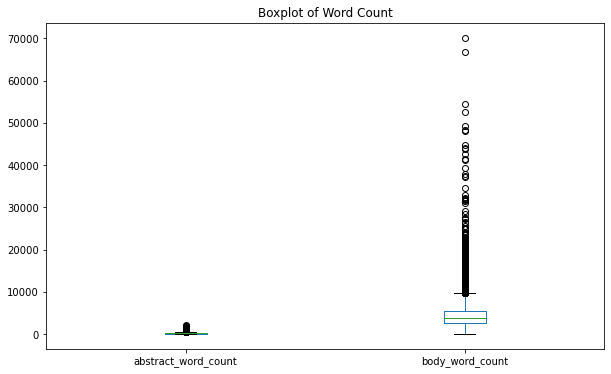

In [96]:
merge2[['abstract_word_count', 'body_word_count']].plot(kind='box', title='Boxplot of Word Count', figsize=(10,6))
plt.show()

In [97]:
merge2.to_csv('merge2.csv')

In [98]:
merge2.head()

,paper_id,title,authors_x,affiliations,abstract_x,text,bibliography,raw_authors,raw_bibliography,cord_uid,...,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,abstract_word_count,body_word_count
0,004f0f8bb66cf446678dc13cf2701feec4f36d76,Healthcare-resource-adjusted vulnerabilities t...,"Hanchu Zhou, Jiannan Yang, Kaicheng Tang, † , ...","Hanchu Zhou (City University of Hong Kong, Hon...",,Introduction\n\nThe 2019-nCoV epidemic has spr...,World Health Organizations. Novel Coronavirus ...,"[{'first': 'Hanchu', 'middle': [], 'last': 'Zh...","{'BIBREF0': {'ref_id': 'b0', 'title': 'World H...",qbemfymp,...,NaN,NaN,NaN,NaN,document_parses/pdf_json/004f0f8bb66cf446678dc...,NaN,https://doi.org/10.1101/2020.02.11.20022111,214042000.0,0,756
5,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,Assessing spread risk of Wuhan novel coronavir...,"Shengjie Lai, Isaac I Bogoch, Nick W Ruktanonc...","Shengjie Lai (University of Southampton, UK), ...",Abstract\n\nBackground: A novel coronavirus (2...,"Introduction\n\nIn December 2019, a cluster of...",A Novel Coronavirus Genome Identified in a Clu...,"[{'first': 'Shengjie', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'A Novel...",iat80b4l,...,medRxiv,NaN,NaN,NaN,document_parses/pdf_json/15edf9aaa1a017841e347...,document_parses/pmc_json/PMC7276059.xml.json,https://doi.org/10.1101/2020.02.04.20020479; h...,213903520.0,23,4682
6,0313c3faa16cd66d64f31ae37e40fb70695d69fb,Feasibility Study of Mitigation and Suppressio...,"Po Yang, Jun Qi, Shuhao Zhang, Xulong Wang, Ga...","Po Yang (The University of Sheffield, Sheffiel...",Abstract\n\nRecent outbreak of coronavirus dis...,\n\none important issue of fitting practical d...,"World Health Organization, , Coronavirus disea...","[{'first': 'Po', 'middle': [], 'last': 'Yang',...","{'BIBREF0': {'ref_id': 'b0', 'title': 'World H...",7yzib4j0,...,NaN,NaN,NaN,NaN,document_parses/pdf_json/b0b9ca98b5b7c14688735...,NaN,https://doi.org/10.1101/2020.04.01.20043794,215782602.0,299,5559
7,03813d8657ba43ea382788caec2d14257b26d8fd,Predict the next moves of COVID-19: reveal the...,"Neaz A Hasan, Mohammad Mahfujul Haque",Neaz A Hasan (Bangladesh Agricultural Universi...,Abstract\n\nThe spread of COVID-19 engulfs alm...,Introduction\n\nAfter the incidence of some my...,Time-varying transmission dynamics of Novel Co...,"[{'first': 'Neaz', 'middle': ['A'], 'last': 'H...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Time-va...",xcacty89,...,NaN,NaN,NaN,NaN,document_parses/pdf_json/03813d8657ba43ea38278...,NaN,https://doi.org/10.1101/2020.04.04.20052928,215782473.0,249,3744
8,03ce432f27c7df6af22b92245a614db2ecb5de5f,A hidden gene in astroviruses encodes a cell-p...,"Valeria Lulla, Andrew E Firth","Valeria Lulla (University of Cambridge, Cambri...",Abstract\n\nHuman astroviruses are small nonen...,INTRODUCTION\n\nHumans astroviruses (HAstVs) b...,Astrovirus infections in humans and animals -m...,"[{'first': 'Valeria', 'middle': [], 'last': 'L...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Astrovi...",avq3zwmc,...,bioRxiv,NaN,NaN,NaN,document_parses/pdf_json/2b30355f2ce32f63872bd...,NaN,https://doi.org/10.1101/661579,195402200.0,630,5735


In [100]:
merge2.drop(['mag_id','who_covidence_id','arxiv_id'],axis=1,inplace=True)

In [103]:
merge2.drop(['sha','abstract_y','url','s2_id'],axis=1,inplace=True)

In [105]:
merge2.dropna(inplace=True)

In [106]:
merge2.isna().sum()

paper_id               0
title                  0
authors_x              0
affiliations           0
abstract_x             0
text                   0
bibliography           0
raw_authors            0
raw_bibliography       0
cord_uid               0
source_x               0
doi                    0
pmcid                  0
pubmed_id              0
license                0
publish_time           0
authors_y              0
journal                0
pdf_json_files         0
pmc_json_files         0
abstract_word_count    0
body_word_count        0
dtype: int64

In [107]:
merge2.shape

(15282, 22)

In [121]:
from langdetect import detect
from langdetect import DetectorFactory

# set seed
DetectorFactory.seed = 0

# hold label - language
languages = []

# go through each text
for ii in tqdm(range(0,len(merge2))):
    # split by space into list, take the first x intex, join with space
    text = merge2.iloc[ii]['text'].split(" ")
    
    lang = "en"
    try:
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    # ught... beginning of the document was not in a good format
    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        # what!! :( let's see if we can find any text in abstract...
        except Exception as e:
            
            try:
                # let's try to label it through the abstract then
                lang = detect(merge2.iloc[ii]['abstract_summary'])
            except Exception as e:
                lang = "unknown"
                pass
    
    # get the language    
    languages.append(lang)

In [114]:
import spacy

In [122]:
from pprint import pprint

languages_dict = {}
for lang in set(languages):
    languages_dict[lang] = languages.count(lang)
    
print("Total: {}\n".format(len(languages)))
pprint(languages_dict)

Total: 15282

{'de': 3, 'en': 15253, 'es': 15, 'fr': 5, 'ko': 1, 'nl': 5}


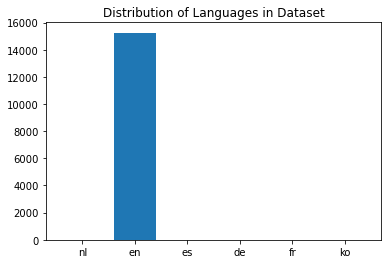

In [124]:
merge2['language'] = languages
plt.bar(range(len(languages_dict)), list(languages_dict.values()), align='center')
plt.xticks(range(len(languages_dict)), list(languages_dict.keys()))
plt.title("Distribution of Languages in Dataset")
plt.show()

In [125]:
merge2 = merge2[merge2['language'] == 'en'] 
merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15253 entries, 5 to 19878
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   paper_id             15253 non-null  object
 1   title                15253 non-null  object
 2   authors_x            15253 non-null  object
 3   affiliations         15253 non-null  object
 4   abstract_x           15253 non-null  object
 5   text                 15253 non-null  object
 6   bibliography         15253 non-null  object
 7   raw_authors          15253 non-null  object
 8   raw_bibliography     15253 non-null  object
 9   cord_uid             15253 non-null  object
 10  source_x             15253 non-null  object
 11  doi                  15253 non-null  object
 12  pmcid                15253 non-null  object
 13  pubmed_id            15253 non-null  object
 14  license              15253 non-null  object
 15  publish_time         15253 non-null  object
 16  auth

In [141]:
from spacy.lang.en.stop_words import STOP_WORDS

In [349]:
import re 
def clean_dataset(text):
    text=re.sub('[\[].*?[\]]', '', str(text))  #remove in-text citation
    text=re.sub(r'^https?:\/\/.*[\r\n]*', '',text, flags=re.MULTILINE)#remove hyperlink
    text=re.sub(r'\\b[A-Z a-z 0-9._ - ]*[@](.*?)[.]{1,3} \\b', '', text)#remove email
    text = re.sub("\n"," ",text)
    text=re.sub(r'  +', ' ',text ) #remove extra space
    text=re.sub('[,\.!?'']', '', text)
    text=re.sub(r's/ ( *)/\1/g','',text) 
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub(r'[^\w\s]','',text) #strip punctuations (recheck)
    
    
    return text

In [350]:
import warnings
warnings.filterwarnings('ignore')
merge2['text'] =merge2['text'].apply(clean_dataset)
merge2['title'] =merge2['title'].apply(clean_dataset)
merge2['abstract_x'] =merge2['abstract_x'].apply(clean_dataset)
merge2['text'] = merge2['text'].map(lambda x: x.lower())
cleanmerge=merge2.reset_index(drop=True)
cleanmerge.head()

,paper_id,title,authors_x,affiliations,abstract_x,text,bibliography,raw_authors,raw_bibliography,cord_uid,...,pdf_json_files,pmc_json_files,abstract_word_count,body_word_count,language,processed_text,processed_title,processed_title_count,processed_abstract_count,title_count
0,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,Assessing spread risk of Wuhan novel coronavir...,"Shengjie Lai, Isaac I Bogoch, Nick W Ruktanonc...","Shengjie Lai (University of Southampton, UK), ...",Abstract Background A novel coronavirus 2019nC...,introduction in december 2019 a cluster of pat...,A Novel Coronavirus Genome Identified in a Clu...,"[{'first': 'Shengjie', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'A Novel...",iat80b4l,...,document_parses/pdf_json/15edf9aaa1a017841e347...,document_parses/pmc_json/PMC7276059.xml.json,23,4554,en,abstract background novel coronavirus 2019ncov...,assessing spread risk wuhan novel coronavirus ...,13,14,18
1,06acb8da0009104a2af509334abe3c26b1da66a1,Coasttocoast spread of SARSCoV2 in the United ...,"Joseph R Fauver, Mary E Petrone, Emma B Hodcro...","Joseph R Fauver (Yale School of Public Health,...",,introduction a novel coronavirus known as sars...,Potential for global spread of a novel coronav...,"[{'first': 'Joseph', 'middle': ['R'], 'last': ...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Potenti...",8m06zdho,...,document_parses/pdf_json/542d3ed4d90ad19ee052f...,document_parses/pmc_json/PMC7276058.xml.json,0,4387,en,,coasttocoast spread sarscov2 united states rev...,8,0,12
2,0eda8331214ca028350b07e2953702f3078a105e,Substantial undocumented infection facilitates...,"Ruiyun Li, † , Sen Pei, Bin Chen, Yimeng Song,...","Ruiyun Li (Imperial College London, W2 1PG, Lo...",Abstract Estimation of the fraction and contag...,infections were 52 as contagious as documente...,"Beijing: China National Health Commission, , U...","[{'first': 'Ruiyun', 'middle': [], 'last': 'Li...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Beijing...",3nipr212,...,document_parses/pdf_json/27a5c6791dab6de53765a...,document_parses/pmc_json/PMC7239048.xml.json,145,2578,en,abstract estimation fraction contagiousness un...,substantial undocumented infection facilitates...,9,85,11
3,0f8261c63cdeeb5c2bf9294eba2954e1ca71b244,Effect of nonpharmaceutical interventions for ...,"Shengjie Lai, Nick W Ruktanonchai, Liangcai Zh...","Shengjie Lai, Nick W Ruktanonchai, Liangcai Zh...",Abstract The COVID19 outbreak containment stra...,could have shown a 3fold 7fold and 18fold inc...,"Novel coronavirus (2019-nCoV), , , 2020; World...","[{'first': 'Shengjie', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Novel c...",jtwb17u8,...,document_parses/pdf_json/e1008925754f127b74ab0...,document_parses/pmc_json/PMC7276028.xml.json,343,3022,en,abstract covid19 outbreak containment strategi...,effect nonpharmaceutical interventions contain...,7,193,11
4,11bb388ea0dbb352e25fcbc8614bfd6e62831e8b,AllinOne Dual CRISPRCas12a AIODCRISPR Assay A ...,"Xiong Ding, Kun Yin, Ziyue Li, Changchun Liu","Xiong Ding, Kun Yin, Ziyue Li, Changchun Liu",Abstract A recent outbreak of novel coronaviru...,introduction sarscov2 previously named 2019nco...,A novel coronavirus from patients with pneumon...,"[{'first': 'Xiong', 'middle': [], 'last': 'Din...","{'BIBREF0': {'ref_id': 'b0', 'title': 'A novel...",vlqd192g,...,document_parses/pdf_json/ed3d0c500ee7cfa48b737...,document_parses/pmc_json/PMC7239053.xml.json,153,2864,en,abstract recent outbreak novel coronavirus sar...,allinone dual crisprcas12a aiodcrispr assay ca...,15,101,20


In [130]:
import string

In [157]:
import en_core_web_sm

In [195]:
import en_core_web_lg

In [351]:
punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords[:10]

["'s",
 'why',
 'nevertheless',
 'becomes',
 'their',
 'did',
 'of',
 'now',
 'hereupon',
 'using']

In [353]:
custom_stop_words = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 
    'al.', 'Elsevier', 'PMC', 'CZI','abstract','introduction'
]

for w in custom_stop_words:
    if w not in stopwords:
        stopwords.append(w)

In [194]:
parser = en_core_web_lg.load(disable=["tagger", "ner"])
parser.max_length = 7000000
i=0
def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

In [196]:
tqdm.pandas()
merge2["processed_text"] = merge2["abstract_x"].progress_apply(spacy_tokenizer)
merge2["processed_title"] = merge2["title"].progress_apply(spacy_tokenizer)

In [178]:
merge2.columns

Index(['paper_id', 'title', 'authors_x', 'affiliations', 'abstract_x', 'text',
       'bibliography', 'raw_authors', 'raw_bibliography', 'cord_uid',
       'source_x', 'doi', 'pmcid', 'pubmed_id', 'license', 'publish_time',
       'authors_y', 'journal', 'pdf_json_files', 'pmc_json_files',
       'abstract_word_count', 'body_word_count', 'language'],
      dtype='object')

In [187]:
from tqdm.notebook import tqdm

In [197]:
merge2.head()

,paper_id,title,authors_x,affiliations,abstract_x,text,bibliography,raw_authors,raw_bibliography,cord_uid,...,publish_time,authors_y,journal,pdf_json_files,pmc_json_files,abstract_word_count,body_word_count,language,processed_text,processed_title
5,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,Assessing spread risk of Wuhan novel coronavir...,"Shengjie Lai, Isaac I Bogoch, Nick W Ruktanonc...","Shengjie Lai (University of Southampton, UK), ...",Abstract Background A novel coronavirus 2019nC...,introduction in december 2019 a cluster of pat...,A Novel Coronavirus Genome Identified in a Clu...,"[{'first': 'Shengjie', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'A Novel...",iat80b4l,...,2020-03-09,"Lai, Shengjie; Bogoch, Isaac I.; Ruktanonchai,...",medRxiv,document_parses/pdf_json/15edf9aaa1a017841e347...,document_parses/pmc_json/PMC7276059.xml.json,23,4682,en,abstract background novel coronavirus 2019ncov...,assessing spread risk wuhan novel coronavirus ...
21,06acb8da0009104a2af509334abe3c26b1da66a1,Coasttocoast spread of SARSCoV2 in the United ...,"Joseph R Fauver, Mary E Petrone, Emma B Hodcro...","Joseph R Fauver (Yale School of Public Health,...",,introduction a novel coronavirus known as sars...,Potential for global spread of a novel coronav...,"[{'first': 'Joseph', 'middle': ['R'], 'last': ...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Potenti...",8m06zdho,...,2020-03-26,"Fauver, Joseph R.; Petrone, Mary E.; Hodcroft,...",medRxiv,document_parses/pdf_json/542d3ed4d90ad19ee052f...,document_parses/pmc_json/PMC7276058.xml.json,0,4502,en,,coasttocoast spread sarscov2 united states rev...
47,0eda8331214ca028350b07e2953702f3078a105e,Substantial undocumented infection facilitates...,"Ruiyun Li, † , Sen Pei, Bin Chen, Yimeng Song,...","Ruiyun Li (Imperial College London, W2 1PG, Lo...",Abstract Estimation of the fraction and contag...,infections were 52 as contagious as documente...,"Beijing: China National Health Commission, , U...","[{'first': 'Ruiyun', 'middle': [], 'last': 'Li...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Beijing...",3nipr212,...,2020-02-17,"Li, Ruiyun; Pei, Sen; Chen, Bin; Song, Yimeng;...",medRxiv,document_parses/pdf_json/27a5c6791dab6de53765a...,document_parses/pmc_json/PMC7239048.xml.json,148,2716,en,abstract estimation fraction contagiousness un...,substantial undocumented infection facilitates...
51,0f8261c63cdeeb5c2bf9294eba2954e1ca71b244,Effect of nonpharmaceutical interventions for ...,"Shengjie Lai, Nick W Ruktanonchai, Liangcai Zh...","Shengjie Lai, Nick W Ruktanonchai, Liangcai Zh...",Abstract The COVID19 outbreak containment stra...,could have shown a 3fold 7fold and 18fold inc...,"Novel coronavirus (2019-nCoV), , , 2020; World...","[{'first': 'Shengjie', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Novel c...",jtwb17u8,...,2020-03-13,"Lai, Shengjie; Ruktanonchai, Nick W; Zhou, Lia...",medRxiv,document_parses/pdf_json/e1008925754f127b74ab0...,document_parses/pmc_json/PMC7276028.xml.json,346,3076,en,abstract covid19 outbreak containment strategi...,effect nonpharmaceutical interventions contain...
68,11bb388ea0dbb352e25fcbc8614bfd6e62831e8b,AllinOne Dual CRISPRCas12a AIODCRISPR Assay A ...,"Xiong Ding, Kun Yin, Ziyue Li, Changchun Liu","Xiong Ding, Kun Yin, Ziyue Li, Changchun Liu",Abstract A recent outbreak of novel coronaviru...,introduction sarscov2 previously named 2019nco...,A novel coronavirus from patients with pneumon...,"[{'first': 'Xiong', 'middle': [], 'last': 'Din...","{'BIBREF0': {'ref_id': 'b0', 'title': 'A novel...",vlqd192g,...,2020-03-21,"Ding, Xiong; Yin, Kun; Li, Ziyue; Liu, Changchun",bioRxiv,document_parses/pdf_json/ed3d0c500ee7cfa48b737...,document_parses/pmc_json/PMC7239053.xml.json,153,2923,en,abstract recent outbreak novel coronavirus sar...,allinone dual crisprcas12a aiodcrispr assay ca...


In [198]:
merge2['processed_title_count'] = merge2['processed_title'].apply(lambda x: len(x.strip().split()))
merge2['processed_abstract_count'] = merge2['processed_text'].apply(lambda x: len(x.strip().split()))
merge2.head()

,paper_id,title,authors_x,affiliations,abstract_x,text,bibliography,raw_authors,raw_bibliography,cord_uid,...,journal,pdf_json_files,pmc_json_files,abstract_word_count,body_word_count,language,processed_text,processed_title,processed_title_count,processed_abstract_count
5,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,Assessing spread risk of Wuhan novel coronavir...,"Shengjie Lai, Isaac I Bogoch, Nick W Ruktanonc...","Shengjie Lai (University of Southampton, UK), ...",Abstract Background A novel coronavirus 2019nC...,introduction in december 2019 a cluster of pat...,A Novel Coronavirus Genome Identified in a Clu...,"[{'first': 'Shengjie', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'A Novel...",iat80b4l,...,medRxiv,document_parses/pdf_json/15edf9aaa1a017841e347...,document_parses/pmc_json/PMC7276059.xml.json,23,4682,en,abstract background novel coronavirus 2019ncov...,assessing spread risk wuhan novel coronavirus ...,13,14
21,06acb8da0009104a2af509334abe3c26b1da66a1,Coasttocoast spread of SARSCoV2 in the United ...,"Joseph R Fauver, Mary E Petrone, Emma B Hodcro...","Joseph R Fauver (Yale School of Public Health,...",,introduction a novel coronavirus known as sars...,Potential for global spread of a novel coronav...,"[{'first': 'Joseph', 'middle': ['R'], 'last': ...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Potenti...",8m06zdho,...,medRxiv,document_parses/pdf_json/542d3ed4d90ad19ee052f...,document_parses/pmc_json/PMC7276058.xml.json,0,4502,en,,coasttocoast spread sarscov2 united states rev...,8,0
47,0eda8331214ca028350b07e2953702f3078a105e,Substantial undocumented infection facilitates...,"Ruiyun Li, † , Sen Pei, Bin Chen, Yimeng Song,...","Ruiyun Li (Imperial College London, W2 1PG, Lo...",Abstract Estimation of the fraction and contag...,infections were 52 as contagious as documente...,"Beijing: China National Health Commission, , U...","[{'first': 'Ruiyun', 'middle': [], 'last': 'Li...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Beijing...",3nipr212,...,medRxiv,document_parses/pdf_json/27a5c6791dab6de53765a...,document_parses/pmc_json/PMC7239048.xml.json,148,2716,en,abstract estimation fraction contagiousness un...,substantial undocumented infection facilitates...,9,85
51,0f8261c63cdeeb5c2bf9294eba2954e1ca71b244,Effect of nonpharmaceutical interventions for ...,"Shengjie Lai, Nick W Ruktanonchai, Liangcai Zh...","Shengjie Lai, Nick W Ruktanonchai, Liangcai Zh...",Abstract The COVID19 outbreak containment stra...,could have shown a 3fold 7fold and 18fold inc...,"Novel coronavirus (2019-nCoV), , , 2020; World...","[{'first': 'Shengjie', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Novel c...",jtwb17u8,...,medRxiv,document_parses/pdf_json/e1008925754f127b74ab0...,document_parses/pmc_json/PMC7276028.xml.json,346,3076,en,abstract covid19 outbreak containment strategi...,effect nonpharmaceutical interventions contain...,7,193
68,11bb388ea0dbb352e25fcbc8614bfd6e62831e8b,AllinOne Dual CRISPRCas12a AIODCRISPR Assay A ...,"Xiong Ding, Kun Yin, Ziyue Li, Changchun Liu","Xiong Ding, Kun Yin, Ziyue Li, Changchun Liu",Abstract A recent outbreak of novel coronaviru...,introduction sarscov2 previously named 2019nco...,A novel coronavirus from patients with pneumon...,"[{'first': 'Xiong', 'middle': [], 'last': 'Din...","{'BIBREF0': {'ref_id': 'b0', 'title': 'A novel...",vlqd192g,...,bioRxiv,document_parses/pdf_json/ed3d0c500ee7cfa48b737...,document_parses/pmc_json/PMC7239053.xml.json,153,2923,en,abstract recent outbreak novel coronavirus sar...,allinone dual crisprcas12a aiodcrispr assay ca...,15,101


<AxesSubplot:ylabel='Density'>

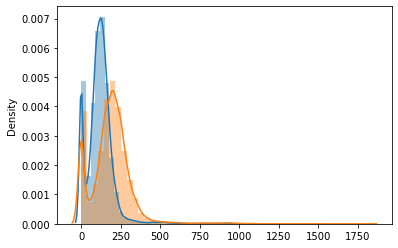

In [218]:
sns.distplot(np.array(merge2.processed_abstract_count))
sns.distplot(np.array(merge2.abstract_word_count))

<AxesSubplot:xlabel='title_count', ylabel='Density'>

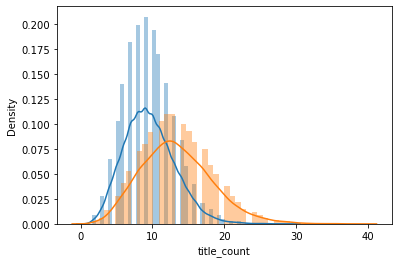

In [356]:
sns.distplot(merge2.processed_title_count)
sns.distplot(merge2.title_count)

In [227]:
merge2.describe()

,abstract_word_count,body_word_count,processed_title_count,processed_abstract_count,title_count
count,15253.000000,15253.000000,15253.000000,15253.000000,15253.000000
mean,186.762342,4272.059333,9.588540,116.473808,13.368649
std,126.662676,2497.190983,3.510089,80.006237,4.949947
min,0.000000,13.000000,1.000000,0.000000,1.000000
25%,124.000000,2711.000000,7.000000,76.000000,10.000000
50%,190.000000,3811.000000,9.000000,117.000000,13.000000
75%,246.000000,5314.000000,12.000000,153.000000,16.000000
max,1699.000000,42931.000000,29.000000,1485.000000,39.000000


In [230]:
from wordcloud import WordCloud

In [239]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=50, figure_size=(15.0,15.0), 
                   title = None, title_size=20, image_color=False):
    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    


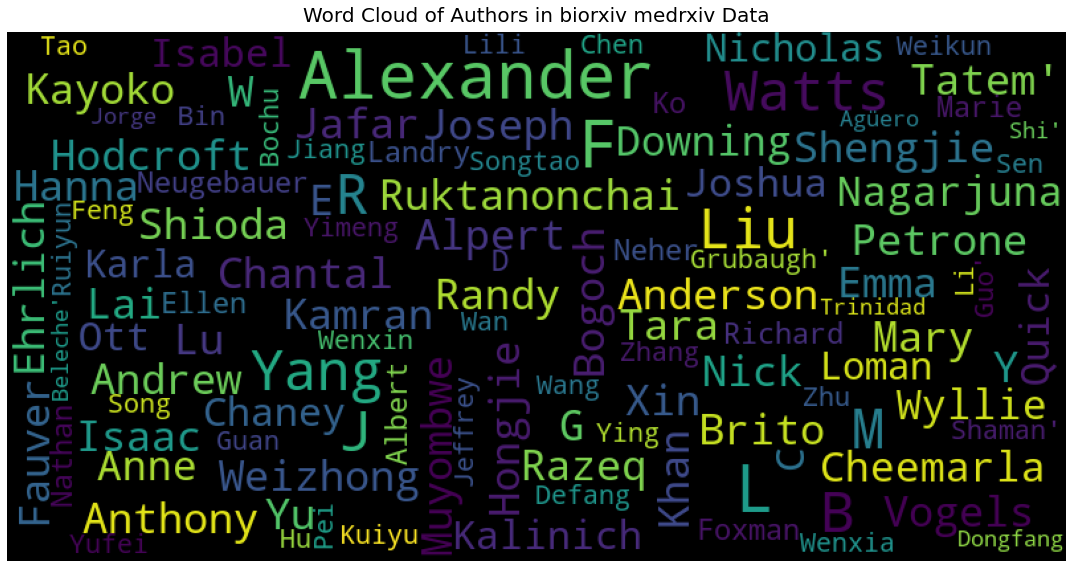

In [243]:
plot_wordcloud(merge2['authors_x'].values, title="Word Cloud of Authors in articles")

In [242]:
merge2.columns

Index(['paper_id', 'title', 'authors_x', 'affiliations', 'abstract_x', 'text',
       'bibliography', 'raw_authors', 'raw_bibliography', 'cord_uid',
       'source_x', 'doi', 'pmcid', 'pubmed_id', 'license', 'publish_time',
       'authors_y', 'journal', 'pdf_json_files', 'pmc_json_files',
       'abstract_word_count', 'body_word_count', 'language', 'processed_text',
       'processed_title', 'processed_title_count', 'processed_abstract_count',
       'title_count'],
      dtype='object')

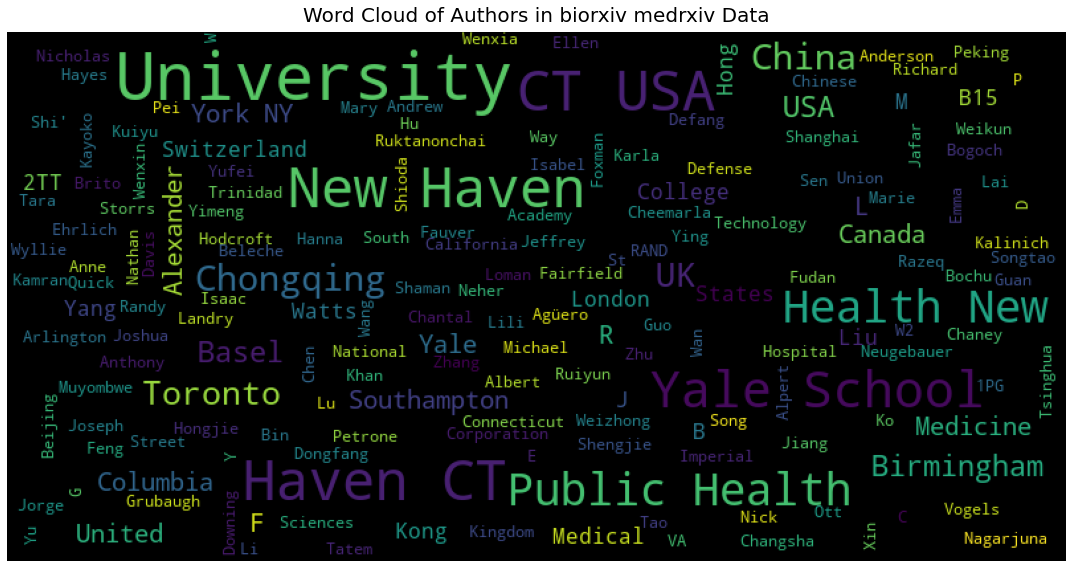

In [244]:
plot_wordcloud(merge2['affiliations'].values, title="Word Cloud of Affiliations in articles")

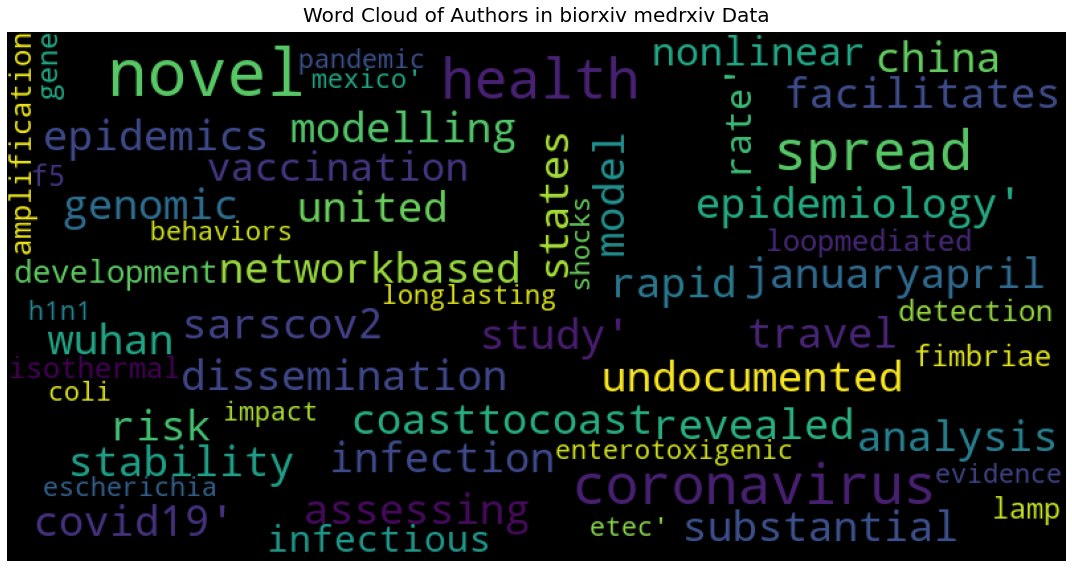

In [265]:
plot_wordcloud(merge2['processed_title'].values, title="Word Cloud of words in the titles of articles")

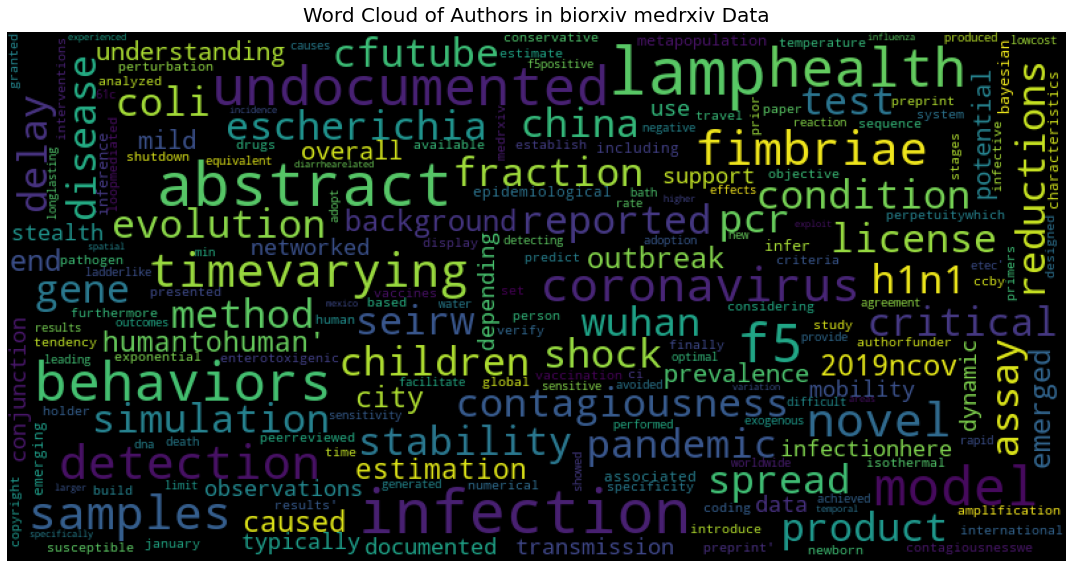

In [266]:
plot_wordcloud(merge2['processed_text'].values, title="Word Cloud of words in abstracts of articles")

In [283]:
def count_ngrams(dataframe,column,begin_ngram,end_ngram):
    word_vectorizer = CountVectorizer(ngram_range=(begin_ngram,end_ngram), analyzer='word')
    sparse_matrix = word_vectorizer.fit_transform(dataframe[column].dropna())
    frequencies = sum(sparse_matrix).toarray()[0]
    most_common = pd.DataFrame(frequencies, 
                               index=word_vectorizer.get_feature_names(), 
                               columns=['frequency']).sort_values('frequency',ascending=False)
    most_common['ngram'] = most_common.index
    most_common.reset_index()
    return most_common

In [284]:
three_gram = count_ngrams(merge2,'processed_title',3,3)

In [269]:
from sklearn.feature_extraction.text import CountVectorizer

In [277]:
import plotly.express as px 

<Figure size 2880x504 with 0 Axes>

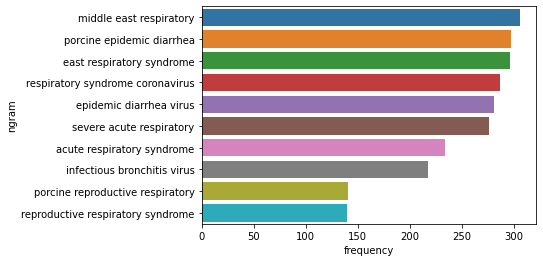

<Figure size 2880x504 with 0 Axes>

In [312]:
ax = sns.barplot(x="frequency", y="ngram", data=three_gram.sort_values('frequency',ascending=False)[0:10],orient = 'h')
plt.figure(figsize=(40,7))

In [313]:
uni_gram = count_ngrams(merge2,'processed_title',1,1)

<Figure size 2880x504 with 0 Axes>

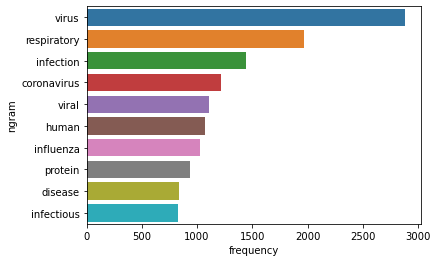

<Figure size 2880x504 with 0 Axes>

In [314]:
ax = sns.barplot(x="frequency", y="ngram", data=uni_gram.sort_values('frequency',ascending=False)[0:10],orient = 'h')
plt.figure(figsize=(40,7))

In [317]:
bii_gram = count_ngrams(merge2,'processed_title',2,2)

<Figure size 2880x504 with 0 Axes>

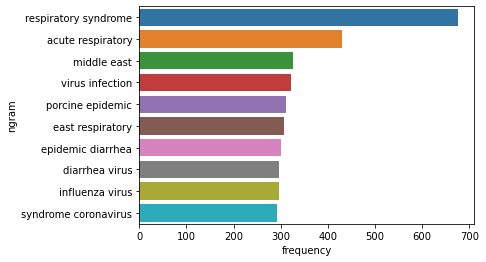

<Figure size 2880x504 with 0 Axes>

In [318]:
ax = sns.barplot(x="frequency", y="ngram", data=bii_gram.sort_values('frequency',ascending=False)[0:10],orient = 'h')
plt.figure(figsize=(40,7))

In [321]:
uni_gram = count_ngrams(merge2,'processed_text',1,1)

<Figure size 2880x504 with 0 Axes>

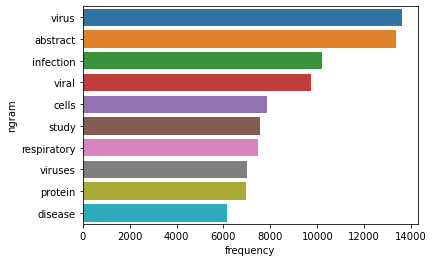

<Figure size 2880x504 with 0 Axes>

In [322]:
ax = sns.barplot(x="frequency", y="ngram", data=uni_gram.sort_values('frequency',ascending=False)[0:10],orient = 'h')
plt.figure(figsize=(40,7))

In [323]:
bii_gram = count_ngrams(merge2,'processed_text',2,2)

<Figure size 2880x504 with 0 Axes>

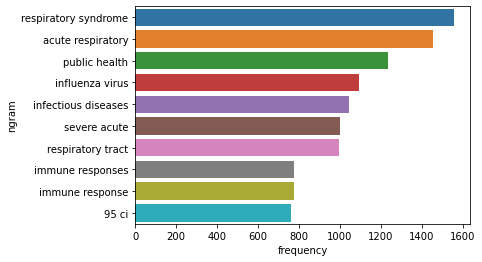

<Figure size 2880x504 with 0 Axes>

In [325]:
ax = sns.barplot(x="frequency", y="ngram", data=bii_gram.sort_values('frequency',ascending=False)[1:11],orient = 'h')
plt.figure(figsize=(40,7))

In [ ]:
three_gram = count_ngrams(merge2,'processed_text',3,3)

In [ ]:
ax = sns.barplot(x="frequency", y="ngram", data=three_gram.sort_values('frequency',ascending=False)[0:10],orient = 'h')
plt.figure(figsize=(40,7))

In [ ]:
A=[[1,2,3],[5,6,7]]

In [ ]:
B=sum(A).toarray()[0]